In [1]:
from extract_alert_data import date_times,locations,all_locations_unique,location_alert_distribution
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [2]:
def draw_polar_hist(vals,bins):
    import numpy as np
    import matplotlib.pyplot as plt

    hist_vals = np.histogram(vals,bins)[0]

    if type(bins) == int:
        N = bins
    else:
        N = len(bins)-1
    bottom = 5
    max_height = 4

    theta = np.linspace(np.pi/2, np.pi/2-2 * np.pi, N, endpoint=False)
    radii = max_height*hist_vals/np.max(hist_vals)
    width = (2*np.pi) / N

    ax = plt.subplot(111, polar=True)
    bars = ax.bar(theta, radii, width=width, bottom=bottom)

    # Use custom colors and opacity
    for r, bar in zip(radii, bars):
        bar.set_facecolor(plt.cm.jet(r / 10.))
        bar.set_alpha(0.8)

def draw_minuets_hist(vals):
    bins = np.arange(-0.5,60.5,1)
    draw_polar_hist(vals,bins)

def draw_hours_hist(vals,num_minuets_in_bin=5):
    bins = np.arange(-0.5,60*24+0.5,num_minuets_in_bin)
    draw_polar_hist(vals,bins)

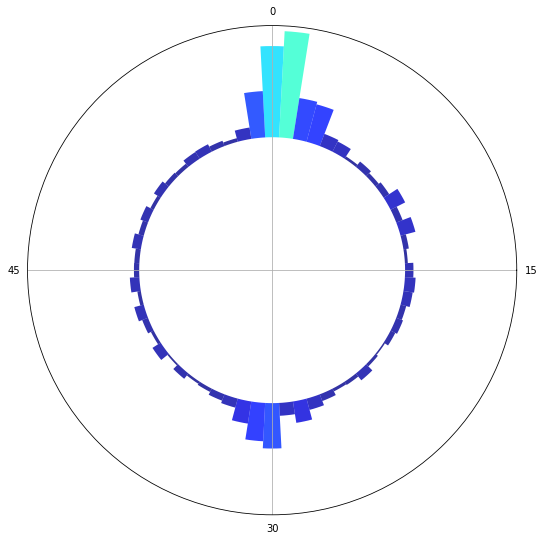

In [3]:
matplotlib.rcParams.update({'font.size': 25})
plt.figure(figsize=(9,9))
times = [dt.minute  for dt in date_times]
draw_minuets_hist(times)
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2],["15","0","45","30"])
plt.yticks([])
plt.savefig("temp2.png",dpi=300)


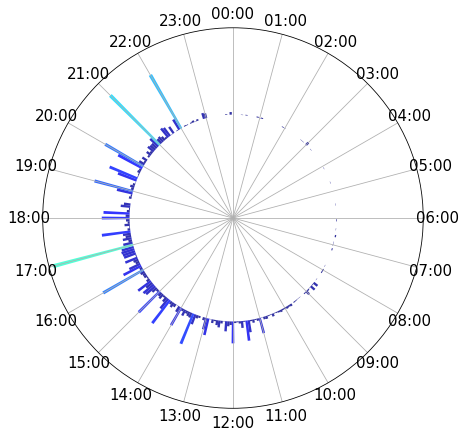

In [4]:
matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(7,7))
times = [dt.minute + dt.hour*60  for dt in date_times]
draw_hours_hist(times,num_minuets_in_bin=5)
plt.xticks(np.arange(0,2*np.pi,np.pi/12),[f"{t:02d}:00" for t in np.arange(6,6-24,-1)%24])
plt.yticks([])
plt.savefig("temp.png",dpi=300)